In [1]:
train = pd.read_json('./raw_data/train.json')
val = pd.read_json('./raw_data/val.json')

In [2]:
song_meta = pd.read_json('./raw_data/song_meta.json')

In [70]:
song_meta

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4
...,...,...,...,...,...,...,...,...,...
707984,[GN2001],19991219,The Best Best Of The Black President,65254,[166499],Coffin For Head Of State,[GN2000],[Fela Kuti],707984
707985,[GN0901],19860000,True Colors,44141,[11837],Change Of Heart,[GN0900],[Cyndi Lauper],707985
707986,"[GN0105, GN0101]",20160120,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,2662866,[437],스치듯 안녕,[GN0100],[윤종신],707986
707987,"[GN1807, GN1801]",20131217,명상의 시간을 위한 뉴에이지 음악,2221722,[729868],숲의 빛,[GN1800],[Nature Piano],707987


In [14]:
val[val['songs'].apply(len) == 1]

16

In [3]:
test = pd.read_json('./raw_data/test.json')

In [4]:
df = pd.concat([train,val,test])

In [5]:
df = df[['id','songs']]

In [4]:
df

,id,songs
0,61281,"[525514, 129701, 383374, 562083, 297861, 13954..."
1,10532,"[432406, 675945, 497066, 120377, 389529, 24427..."
2,76951,"[83116, 276692, 166267, 186301, 354465, 256598..."
3,147456,"[394031, 195524, 540149, 287984, 440773, 10033..."
4,27616,"[159327, 553610, 5130, 645103, 294435, 100657,..."
...,...,...
23010,101722,"[75842, 26083, 244183, 684715, 500593, 508608,..."
23011,122127,"[450275, 487671, 561031, 663944, 628672, 59121..."
23012,77438,"[625875, 464051, 11657, 236393, 358186, 213435..."
23013,36231,"[161094, 665833, 688145, 432735, 439938, 12665..."


In [ ]:
# 특정 노래가 같은 리스트 안에 들어 있었을때, 각 노래별로 count +1 씩 해서
# 1 - (count/len(df))을 계산하면, 0~1 사이의 값이 나옴
# 이 값으로 노래간의 거리를 나타내는 matrix를 만들고 노래가 한곡이라도 있으면 제일 가까운 순서대로 찾아서 넣어준다
# 예외로 그 어떤 리스트에도 중복되지 않고 한번만 등장한 노래는 2의 값을 줄수 있도록 설계, 즉 count가 0값인 경우는 공식 계산하지 말고 그냥 2로 넣어줌

In [85]:
song_meta['id'].tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [96]:
for i in song_meta['id'].tolist():

SyntaxError: unexpected EOF while parsing (<ipython-input-96-8b0a2694a1c5>, line 1)

In [110]:
def method(ls, j ):
    ls = []
    for l in ls:
        ls.append({
            "id": j,
         l:1
        })
    return ls

In [136]:
np.intersect1d([1,2,3],[2,3])

array([2, 3])

In [139]:
D = []
for i in range(100):
    for j in range(100):
        new_array = np.intersect1d(df['songs'].iloc[i], df['songs'].iloc[j])
        count = 0 
        d = []
        for k in new_array:
            count += 1
            d.append({k:count})
            count = 0
        D.append(d)

In [125]:
result

[{50104: 1},
 {72552: 1},
 {121455: 1},
 {127099: 1},
 {129701: 1},
 {139541: 1},
 {205238: 1},
 {223955: 1},
 {297861: 1},
 {324992: 1},
 {351214: 1},
 {383374: 1},
 {461973: 1},
 {525514: 1},
 {531057: 1},
 {562083: 1},
 {650298: 1},
 {660493: 1},
 {706183: 1}]

In [197]:
for j in range(0):
    result = df[df['songs'].apply(lambda x : True if j in x else False)]
    a = result.songs.values.sum()
    result = pd.DataFrame([i[0] for i in Counter(a).most_common()][:100]).T

In [198]:
result

,id,songs
74827,95563,"[36457, 243286, 452316, 399637, 169627, 615644..."
108964,100446,"[180787, 400123, 463430, 483547, 549912, 43346..."


In [148]:
from collections import Counter

In [43]:
df_songs = df['songs'].apply(lambda x : [str(i) for i in x])

In [44]:
df_songs = df['songs'].reset_index(drop=True)

In [45]:
unique_song_list = np.concatenate(df_songs,)

In [46]:
unique_song_list = list(set(unique_song_list))

In [48]:
unique_song_list = [int(i) for i in unique_song_list]

In [49]:
unique_song_list

[0,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 193,
 194,
 195,
 196,
 198,
 199,


# playlist에 언급된 unique한 노래들 추출

In [232]:
result = df[df['songs'].apply(lambda x : True if 6 in x else False)]
a = result.songs.values.sum()
df = pd.DataFrame([i[0] for i in Counter(a).most_common()][:100]).T
df.concat([df])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,269044,121919,574342,500940,63432,430751,167319,547576,519368,541628,...,487714,298578,354599,134269,391092,673709,572664,87779,321193,321118


In [ ]:
pd.DataFrame([i[0] for i in Counter(a).most_common()][:100]).T

In [228]:
Counter(a)

Counter({269044: 1,
         121919: 1,
         574342: 1,
         500940: 1,
         63432: 1,
         430751: 1,
         167319: 1,
         547576: 1,
         519368: 1,
         541628: 1,
         287591: 1,
         341133: 1,
         309296: 1,
         355463: 1,
         6: 1,
         147824: 1,
         251268: 1,
         50099: 1,
         487714: 1,
         298578: 1,
         354599: 1,
         134269: 1,
         391092: 1,
         673709: 1,
         572664: 1,
         87779: 1,
         321193: 1,
         321118: 1})

In [200]:
pd.DataFrame([i[0] for i in Counter(a).most_common()][:100]).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,36457,594592,0,572238,243286,452316,399637,169627,615644,327113,...,614659,278629,697349,216485,329922,70624,383918,521272,560234,216726


In [104]:
df[df['songs'].apply(lambda x : True if 525514 in x else False)]

,id,songs
0,61281,"[525514, 129701, 383374, 562083, 297861, 13954..."
2983,122798,"[671027, 34258, 660596, 694894, 166301, 86767,..."
41152,76836,"[681635, 175480, 397694, 14247, 41049, 177048,..."
56957,117966,"[594210, 432845, 321035, 466641, 181725, 27475..."
84255,19623,"[55999, 30336, 228812, 458606, 506359, 687639,..."
99726,10853,"[329664, 26440, 14247, 41049, 177048, 213318, ..."
104098,94159,"[487399, 357099, 100230, 525514, 648175, 53788..."
2768,53952,"[405804, 262949, 499587, 309112, 261799, 58601..."


In [94]:
525514 in df['songs'].values[0]

True

In [79]:
D = []
for j in range(3):
    d = []
    for i in df.songs.values[j]:
        dt = {str(i),0}
        d.append(dt)
        for k in D:            
            if 432406 in k:
                print("yes")
        D.append(d)

In [80]:
D[0]

[{0, '525514'},
 {0, '129701'},
 {0, '383374'},
 {0, '562083'},
 {0, '297861'},
 {0, '139541'},
 {0, '351214'},
 {0, '650298'},
 {0, '531057'},
 {0, '205238'},
 {0, '706183'},
 {0, '127099'},
 {0, '660493'},
 {0, '461973'},
 {0, '121455'},
 {0, '72552'},
 {0, '223955'},
 {0, '324992'},
 {0, '50104'}]

In [38]:
pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]])

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [9]:
count = 12

In [10]:
1 - (count/len(df))

0.9999130976348073

In [3]:
df = df[['id','songs']]

In [4]:
# val에만 노래가 없는 플레이리스트가 있음
df = df[df['songs'].apply(len) != 0]

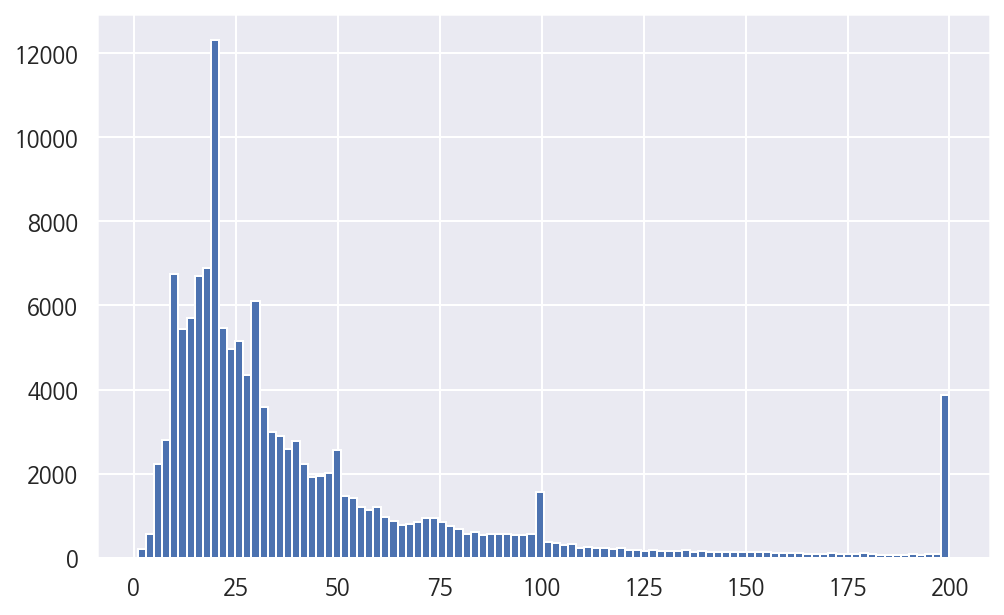

In [5]:
plt.hist(df['songs'].apply(len),bins=100)
plt.show()

In [6]:
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np

import random
import sys
import io
import re

Using TensorFlow backend.


In [7]:
df

,id,songs
0,61281,"[525514, 129701, 383374, 562083, 297861, 13954..."
1,10532,"[432406, 675945, 497066, 120377, 389529, 24427..."
2,76951,"[83116, 276692, 166267, 186301, 354465, 256598..."
3,147456,"[394031, 195524, 540149, 287984, 440773, 10033..."
4,27616,"[159327, 553610, 5130, 645103, 294435, 100657,..."
...,...,...
23010,101722,"[75842, 26083, 244183, 684715, 500593, 508608,..."
23011,122127,"[450275, 487671, 561031, 663944, 628672, 59121..."
23012,77438,"[625875, 464051, 11657, 236393, 358186, 213435..."
23013,36231,"[161094, 665833, 688145, 432735, 439938, 12665..."


In [19]:
val[val['songs'].apply(len) == 1]

,tags,id,plylst_title,songs,like_cnt,updt_date
829,[],118562,,[707293],13,2016-06-29 18:44:23.000
1235,[],60825,,[158207],95,2014-12-15 18:19:57.000
2519,[],93893,,[590860],0,2018-02-26 10:11:20.000
2880,[],113370,,[404812],76,2008-11-27 16:13:26.000
4353,[],109786,,[124539],1,2019-06-12 10:10:24.000
5417,[],31314,,[382530],0,2019-06-12 10:10:24.000
5987,[],27746,,[268414],12,2016-11-07 15:59:29.000
7051,[],95216,,[23640],72,2013-04-17 10:55:23.000
9487,[여름],50781,,[532375],77,2014-07-31 10:07:53.000
10315,[],13972,,[598137],2,2014-12-04 00:08:30.000


In [15]:
chars = list(set(text))
print('total chars:', len(text))

total chars: 45146


In [16]:
char_indices = dict(((c,i) for i,c in enumerate(chars)))
indices_char = dict(((i,c) for i,c in enumerate(chars)))

In [17]:
df['songs'].iloc[:3]

0    [525514, 129701, 383374, 562083, 297861, 13954...
1    [432406, 675945, 497066, 120377, 389529, 24427...
2    [83116, 276692, 166267, 186301, 354465, 256598...
Name: songs, dtype: object

In [8]:
encoding = np.eye(10)

In [9]:
encoding

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [22]:
def levenshtein(s1, s2, cost=None, debug=False):
    if len(s1) < len(s2):
        return levenshtein(s2, s1, debug=debug)

    if len(s2) == 0:
        return len(s1)

    if cost is None:
        cost = {}

    # changed
    def substitution_cost(c1, c2):
        if c1 == c2:
            return 0
        return cost.get((c1, c2), 1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            # Changed
            substitutions = previous_row[j] + substitution_cost(c1, c2)
            current_row.append(min(insertions, deletions, substitutions))

        if debug:
            print(current_row[1:])

        previous_row = current_row

    return previous_row[-1]

In [26]:
from tqdm import tqdm

In [34]:
from editdistance import eval as edit_distance

In [48]:
from collections import deque

In [49]:
dq = deque(list(np.zeros(len(train.songs.values))))

In [62]:
def test():
    D = []
    values = train.songs.values
    for value_1 in values[:1]:
        d = []
        for value_2 in values:        
            d.append(edit_distance(value_1, value_2))
        D.append(d)

In [56]:
values = train.songs.values
D = [
    [edit_distance(value_1, value_2) for value_2 in values]
    for value_1 in values[:5]
]

In [60]:
from cProfile import Profile
from pstats import Stats

In [64]:
profile = Profile()

In [65]:
profile.runcall(test)

In [67]:
stats = Stats(profile)
stats.strip_dirs()
stats.sort_stats('cumulative')
stats.print_stats()

         230173 function calls in 1.782 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.040    0.040    1.782    1.782 <ipython-input-62-6022aca7cc45>:1(test)
   115071    1.733    0.000    1.733    0.000 {built-in method editdistance.bycython.eval}
   115072    0.008    0.000    0.008    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 generic.py:5162(__getattr__)
        1    0.000    0.000    0.000    0.000 base.py:4297(_can_hold_identifiers_and_holds_name)
        1    0.000    0.000    0.000    0.000 frame.py:2949(__getitem__)
        1    0.000    0.000    0.000    0.000 base.py:1826(is_object)
        1    0.000    0.000    0.000    0.000 common.py:225(is_object_dtype)
        1    0.000    0.000    0.000    0.000 series.py:517(values)
        1    0.000    0.000    0.000    0.000 common.py:1886(_is_dtype_type)
        2    0.000    0.000    0.000    0.000 base.

In [32]:
!pip install editdistance

     |████████████████████████████████| 43 kB 331 kB/s eta 0:00:011
ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/Users/yoohowon/opt/anaconda3/envs/fastcampus/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/Users/yoohowon/opt/anaconda3/envs/fastcampus/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/yoohowon/opt/anaconda3/envs/fastcampus/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/Users/yoohowon/opt/anaconda3/envs/fastcampus/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)


In [23]:
train['songs'].iloc[0]

[525514,
 129701,
 383374,
 562083,
 297861,
 139541,
 351214,
 650298,
 531057,
 205238,
 706183,
 127099,
 660493,
 461973,
 121455,
 72552,
 223955,
 324992,
 50104]